In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
model_path = os.path.join("D:\\Study\Python\Fruit-recognizer-application",
                          "models\saved_models\model1_vgg16_architecture.json")

weights_path = os.path.join("D:\\Study\Python\Fruit-recognizer-application",
                          "models\saved_models\model1_vgg16_best1_weights.hdf5")

In [3]:
test_path = os.path.join("dataset", "test_new")
classes = ['Apple Red Yellow', 'Apple Golden 1', 'Avocado', 'Avocado ripe', 'Banana',
          'Cocos', 'Dates', 'Granadilla', 'Grape Pink', 'Grape White',
          'Kiwi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes',
          'Nectarine', 'Orange', 'Peach', 'Peach Flat', 'Apricot']
n_classes = len(classes)

img_height, img_width, n_channels = 100, 100, 3

In [4]:
datagen = ImageDataGenerator(rescale=1 / 255)

test_generator =  datagen.flow_from_directory(
    test_path,
    classes=classes,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

Found 1633 images belonging to 20 classes.


In [5]:
with open(model_path, "r") as json_file:
    loaded_model = json_file.read()
loaded_model = model_from_json(loaded_model)

loaded_model.load_weights(weights_path)

loaded_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
scores = loaded_model.evaluate_generator(test_generator)
print("Test accuracy after last epoch =", scores[1])

Test accuracy after last epoch = 0.9920391916717698


### Test on real pictures

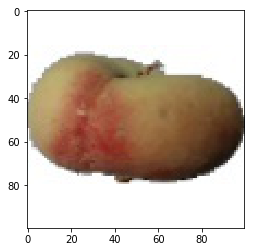

In [6]:
#picture_path = os.path.join("dataset", "test", "Apricot", "3_100.jpg")
picture_path = "nectarine-1.jpg"
picture_path = os.path.join("dataset", "test", "Peach Flat", "3_100.jpg")
image = cv2.imread(picture_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = cv2.resize(image, (100, 100))
plt.imshow(image)

In [8]:
image = np.expand_dims(image, axis=0) / 255
print(np.argmax(loaded_model.predict(image)))

18


### Test FruitRecognizer class

In [7]:
class FruitRecognizer():
    """Class for classification fruit on the picture"""
    
    def __init__(self, model_path="saved_models\model1_vgg16_architecture.json",
                 weights_path="saved_models\model1_vgg16_best1_weights.hdf5"):
        """
        Parameters:
        model_path : json file path with the model to load.
        path_weigths : hdf5 file path with weights to load.
        """
        
        with open(model_path, "r") as json_file:
            loaded_model = json_file.read()
        self.model = model_from_json(loaded_model)

        self.model.load_weights(weights_path)
        self.model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        
    def predict(self, image, return_probs=False):
        """
        Parameters:
        image : ndarray of shape like (100, 100, 3)
            Represents 3-channel picture.
        
        Returns:
        predict : int, if return_probs == False
                  ndarray of class probabilities, if return_probs == True
        """
        image = cv2.resize(image, (100, 100))
        image = np.expand_dims(image, axis=0) / 255

        if return_probs:
            predict = self.model.predict(image)
        else:
            predict = np.argmax(self.model.predict(image))
        
        return predict
        

In [6]:
import cv2, os

picture_path = os.path.join("dataset", "test", "Apricot", "3_100.jpg")
#picture_path = "nectarine-1.jpg"
#picture_path = os.path.join("dataset", "test", "Peach Flat", "3_100.jpg")

image = cv2.imread(picture_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = cv2.resize(image, (100, 100))
#plt.imshow(image)

In [13]:
CNN = FruitRecognizer()

In [14]:
CNN.predict(image)

19

### Test recognizer module

In [1]:
import recognizer

Using TensorFlow backend.


In [2]:
model = recognizer.FruitRecognizer()

In [7]:
model.predict(image)

19

In [19]:
scores = model.model.evaluate_generator(test_generator, verbose=1)
print("Test accuracy after last epoch =", scores[1])

52/52 [==============================] - 36s 690ms/step
Test accuracy after last epoch = 0.9920391916717698
